In [1]:
# 载入分析中需要使用的包，并设置绘图环境
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['font.sans-serif'] = ["Dengxian","Whitney Book"]

In [2]:
# 调用pandas包，读取xlsx格式样本数据文件
loanData = pd.read_excel('data/CFData.xlsx')

In [3]:
# 预览数据表前3行
loanData.head(3)

,公司名称,城市,贷款金额,期限,月供,还款总费用,月管理费,期限最低范围,期限最高范围,还款方式,放款日期,审批时间,担保方式,申请人数,申请条件
0,中腾信金融信息服务（上海）有限公司北京分公司,北京,10万元,12月,9225,1.07,月管理费 1.60%,1,12,分期还款,1,1.0,信用贷,198,北京牌照车辆、全款车、购买三个月以上1、名下有北京牌照车辆2、全款车、购买三个月以上3、信用...
1,北京森强国际投资担保有限公司,北京,10万元,12月,10046,2.06,月管理费 3.00%,1,120,到期还款,1,1.0,抵押贷,44,名下有车、北京牌照、有稳定还款来源1、名下有车2、北京牌照3、有稳定还款来源温馨提示：名下有...
2,北京博瑞奕华投资有限公司,北京,10万元,12月,9333,1.20,参考月利率 1.00%,1,36,分期还款,3,1.0,信用贷,308,中国合法公民、18-60周岁、信用良好1、中国合法公民2、年龄在18-60岁3、具有完全民事...


In [4]:
# 数据表概况
print(loanData.info())
print('==========================')
loanData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 15 columns):
公司名称      1046 non-null object
城市        1046 non-null object
贷款金额      1046 non-null object
期限        1046 non-null object
月供        1046 non-null int64
还款总费用     1046 non-null float64
月管理费      1046 non-null object
期限最低范围    1046 non-null int64
期限最高范围    1046 non-null int64
还款方式      1046 non-null object
放款日期      1046 non-null object
审批时间      1044 non-null float64
担保方式      1046 non-null object
申请人数      1046 non-null int64
申请条件      1036 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 122.7+ KB
None


,月供,还款总费用,期限最低范围,期限最高范围,审批时间,申请人数
count,1046.000000,1046.000000,1046.000000,1046.000000,1044.000000,1046.000000
mean,9984.283939,1.994484,8.358509,36.659656,2.000000,1200.871893
std,739.591401,0.874316,4.459553,22.863791,1.707802,4509.135575
min,8333.000000,0.000000,1.000000,12.000000,0.000000,0.000000
25%,9333.000000,1.222500,3.000000,36.000000,1.000000,0.000000
50%,10133.000000,2.160000,12.000000,36.000000,2.000000,33.000000
75%,10633.000000,2.760000,12.000000,36.000000,2.000000,462.000000
max,12633.000000,5.160000,12.000000,360.000000,21.000000,62898.000000


In [ ]:
# 消费贷申请人数分布(全部人数)
plt.figure()
N,_,patches = plt.hist(loanData['申请人数'],alpha=0.8,ec='k',linewidth=0.5,bins=30)
# Color each bar by y-value
for yval,patch in zip(N,patches):
    patch.set_facecolor(plt.cm.PuRd(yval/N.max()))
plt.xticks(fontsize=12,**{'fontname':'WhitneyNumeric Book'})
plt.yticks(fontsize=12,**{'fontname':'WhitneyNumeric Book'})
plt.xlabel('申请人数',fontsize=12)
plt.ylabel('贷款种类',fontsize=12)
plt.show()

In [ ]:
# 消费贷申请人数分布（千人以内）
plt.figure()
N,_,patches = plt.hist(loanData[loanData['申请人数']<1000]['申请人数'],alpha=0.8,ec='k',linewidth=0.5,bins=30)
# Color each bar by y-value
for yval,patch in zip(N,patches):
    patch.set_facecolor(plt.cm.PuRd(yval/N.max()))
plt.xticks(fontsize=12,**{'fontname':'WhitneyNumeric Book'})
plt.yticks(fontsize=12,**{'fontname':'WhitneyNumeric Book'})
plt.xlabel('申请人数',fontsize=12)
plt.ylabel('贷款种类',fontsize=12)
#plt.xlim((0,1000))
plt.show()

In [5]:
# 机构性质分析： 贷款机构分为银行、保险公司、及其他金融公司三类
## 构造一个新列：机构性质
loanData.insert(1,'机构性质',None)
loanData.loc[loanData['公司名称'].str.contains('银行'),'机构性质'] = '银行'
loanData.loc[loanData['公司名称'].str.contains('保险'),'机构性质'] = '保险'
loanData.loc[loanData['机构性质'].isnull(),'机构性质'] = '其他'

In [14]:
## 构造一个新列：城市类别，分为北上广深（一线）及其他城市两类
loanData.insert(3,'城市类别',None)
loanData.loc[(loanData['城市']=='北京'),'城市类别'] = '一线'
loanData.loc[(loanData['城市']=='上海'),'城市类别'] = '一线'
loanData.loc[(loanData['城市']=='广州'),'城市类别'] = '一线'
loanData.loc[(loanData['城市']=='深圳'),'城市类别'] = '一线'
loanData.loc[loanData['城市类别'].isnull(),'城市类别'] = '其他'

In [31]:
# 不同机构类别的产品个数(全部/部分城市)
loanCount_byFirm = loanData.groupby('机构性质').count()['公司名称']
loanCount_byCity = loanData.groupby(['机构性质','城市类别']).count()['公司名称']
# 不同机构类别/城市类别的申请人数
applicants_byFirm = loanData.groupby('机构性质').sum()['申请人数']
applicants_byCity = loanData.groupby(['机构性质','城市类别']).sum()['申请人数']
# 不同机构类别产品平均申请人数
appl_per_prod_byFirm = applicants_byFirm/loanCount_byFirm

In [62]:
loanData.groupby('城市类别').count()['公司名称']

城市类别
一线    446
其他    600
Name: 公司名称, dtype: int64

In [60]:
loanData.groupby('城市类别').sum()['申请人数']

城市类别
一线    645854
其他    610258
Name: 申请人数, dtype: int64

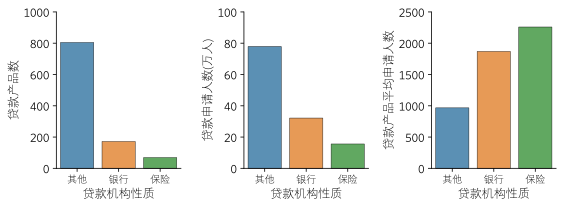

In [203]:
# 不同性质机构数量柱状图
plt.figure(figsize=(8,3))
ax1 = plt.subplot(1,3,1)
sns.despine(ax=ax1)
sns.countplot(ax=ax1,x='机构性质',data=loanData,order=['其他','银行','保险'],alpha=0.8,ec='k',linewidth=0.5)
#sns.barplot(ax=ax1,x=loanCount_byFirm.index,y=loanCount_byCity.values[::2],order=['其他','银行','保险'],alpha=0.8)#,ec='k',linewidth=0.5)
ax1.tick_params(axis='x',labelsize=10)
plt.yticks(**{'fontname':'WhitneyNumeric Book'})
ax1.tick_params(axis='y',labelsize=12)
ax1.set_ylim(ymax=ax1.get_yticks().max())
ax1.set_xlabel('贷款机构性质',fontsize=12)
ax1.set_ylabel('贷款产品数',fontsize=12)

# 不同性质机构发放贷款申请人数柱状图
ax2 = plt.subplot(1,3,2)
sns.despine(ax=ax2)
sns.barplot(ax=ax2,x=applicants_byFirm.index,y=applicants_byFirm.values/10000,order=['其他','银行','保险'],alpha=0.8,ec='k',linewidth=0.5)
#sns.barplot(ax=ax2,x=applicants_byFirm.index,y=applicants_byCity.values[::2]/10000,order=['其他','银行','保险'],alpha=0.8)#,ec='k',linewidth=0.5)
ax2.tick_params(axis='x',labelsize=10)
plt.yticks(**{'fontname':'WhitneyNumeric Book'})
ax2.tick_params(axis='y',labelsize=12)
ax2.set_ylim(ymax=ax2.get_yticks().max())
ax2.set_xlabel('贷款机构性质',fontsize=12)
ax2.set_ylabel('贷款申请人数(万人)',fontsize=12)

# 不同性质机构各产品平均申请人数柱状图
ax3 = plt.subplot(1,3,3)
sns.despine(ax=ax3)
sns.barplot(ax=ax3,x=appl_per_prod_byFirm.index,y=appl_per_prod_byFirm.values,order=['其他','银行','保险'],alpha=0.8,ec='k',linewidth=0.5)
ax3.tick_params(axis='x',labelsize=10)
plt.yticks(**{'fontname':'WhitneyNumeric Book'})
ax3.tick_params(axis='y',labelsize=12)
ax3.set_ylim(ymax=ax3.get_yticks().max())
ax3.set_xlabel('贷款机构性质',fontsize=12)
ax3.set_ylabel('贷款产品平均申请人数',fontsize=12)

plt.tight_layout()
plt.savefig('贷款机构性质.png',transparent=True,dpi=600)

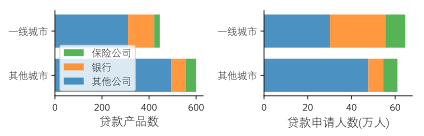

In [191]:
plt.figure(figsize=(6,2))
ax1 = plt.subplot(1,2,1)
sns.despine(ax=ax1)
p1 = ax1.barh([0.7,0.3],loanCount_byCity['其他'],height=0.3,left=0,alpha=0.8)
p2 = ax1.barh([0.7,0.3],loanCount_byCity['银行'],height=0.3,left=loanCount_byCity['其他'],alpha=0.8)
p3 = ax1.barh([0.7,0.3],loanCount_byCity['保险'],height=0.3,left=loanCount_byCity['其他']+loanCount_byCity['银行'],alpha=0.8)
plt.xticks(**{'fontname':'WhitneyNumeric Book'})
ax1.set_xlabel('贷款产品数',fontsize=12)
plt.yticks([0.3,0.7],['其他城市','一线城市'])
plt.legend((p3[0],p2[0],p1[0]),('保险公司','银行','其他公司'),loc='lower left',)#,frameon=False)

ax2 = plt.subplot(1,2,2)
sns.despine(ax=ax2)
p1 = ax2.barh([0.7,0.3],applicants_byCity['其他']/10000,height=0.3,left=0,alpha=0.8)
p2 = ax2.barh([0.7,0.3],applicants_byCity['银行']/10000,height=0.3,left=applicants_byCity['其他']/10000,alpha=0.8)
p3 = ax2.barh([0.7,0.3],applicants_byCity['保险']/10000,height=0.3,left=(applicants_byCity['其他']+applicants_byCity['银行'])/10000,alpha=0.8)
plt.xticks(**{'fontname':'WhitneyNumeric Book'})
ax2.set_xlabel('贷款申请人数(万人)',fontsize=12)
plt.yticks([0.3,0.7],['其他城市','一线城市'])

plt.tight_layout()
plt.savefig('城市.png',transparent=True,dpi=600)

In [38]:
loanData[loanData['还款总费用']>2*(loanData['月供']*12-100000)/10000].count()

公司名称      7
机构性质      7
城市        7
贷款金额      7
期限        7
月供        7
还款总费用     7
月管理费      7
期限最低范围    7
期限最高范围    7
还款方式      7
放款日期      7
审批时间      7
担保方式      7
申请人数      7
申请条件      7
dtype: int64

In [8]:
# 计算实际年化利率
loanData.insert(7,'实际年利率',loanData['还款总费用']*10)

In [9]:
# 根据计算得到的实际年化利率，统计申请人数，并分组求和用于绘图
appl_on_rates = loanData.groupby('实际年利率').sum()['申请人数']
cum_appl_on_rates = np.array([])
cum_appl_on_rates = np.append(cum_appl_on_rates,(sum(appl_on_rates[appl_on_rates.index<12])))
cum_appl_on_rates = np.append(cum_appl_on_rates,(sum(appl_on_rates[(appl_on_rates.index>=12) & (appl_on_rates.index<24)])))
cum_appl_on_rates = np.append(cum_appl_on_rates,(sum(appl_on_rates[(appl_on_rates.index>=24) & (appl_on_rates.index<48)])))
cum_appl_on_rates = np.append(cum_appl_on_rates,(sum(appl_on_rates[(appl_on_rates.index>=48) & (appl_on_rates.index<60)])))
#np.append(cum_appl_on_rates,(sum(appl_on_rates[appl_on_rates.index>=60])))

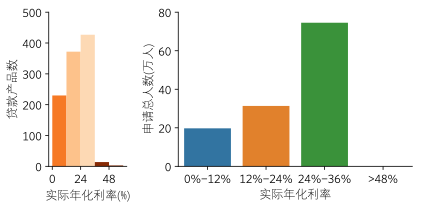

In [206]:
from matplotlib import gridspec 
fig = plt.figure(figsize=(6, 3)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3]) 
ax0 = plt.subplot(gs[0]) 
sns.despine(ax=ax0)
N,_,patches = ax0.hist(x=loanData['实际年利率'],bins=[0,12,24,36,48,60])
# Color each bar by y-value
for yval,patch in zip(N,patches):
    patch.set_facecolor(plt.cm.Oranges_r(0.8*yval/N.max()))
plt.xticks(list(range(0,60,24)),list(range(0,60,24)),fontsize=12,**{'fontname':'WhitneyNumeric Book'})
plt.yticks(fontsize=12,**{'fontname':'WhitneyNumeric Book'})
plt.ylim(ymax=plt.gca().get_yticks().max())
plt.xlabel('实际年化利率(%)',fontsize=12)
plt.ylabel('贷款产品数',fontsize=12)

ax1 = plt.subplot(gs[1]) 
sns.despine(ax=ax1)
sns.barplot(ax=ax1,x=list(range(len(cum_appl_on_rates))),y=cum_appl_on_rates/10000)
plt.xticks(list(range(len(cum_appl_on_rates))),['0%-12%','12%-24%','24%-36%','>48%'],fontsize=12,**{'fontname':'WhitneyNumeric Book'})
plt.yticks(fontsize=12,**{'fontname':'WhitneyNumeric Book'})
plt.ylim(ymax=plt.gca().get_yticks().max())
plt.xlabel('实际年化利率',fontsize=12)
plt.ylabel('申请总人数(万人)',fontsize=12)
plt.tight_layout()
plt.savefig('实际年化利率_产品数_人数.png',transparent=True,dpi=600)

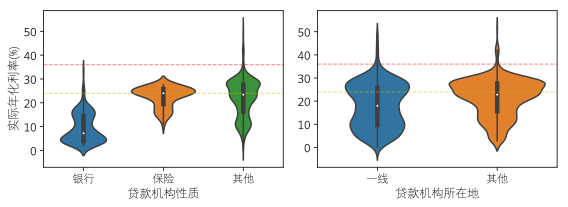

In [204]:
# 不同类型机构实际年化利率boxplot/violinplot
plt.figure(figsize=(8,3))
ax1 = plt.subplot(1,2,1)
sns.violinplot(ax=ax1,x='机构性质',y='实际年利率',order=['银行','保险','其他'],data=loanData)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12,**{'fontname':'WhitneyNumeric Book'})
plt.xlabel('贷款机构性质',fontsize=12)
plt.ylabel('实际年化利率(%)',fontsize=12)
plt.axhline(y=24,ls='--',lw=1,color='y',alpha=0.5)
plt.axhline(y=36,ls='--',lw=1,color='r',alpha=0.5)

# 不同类别城市实际年化利率boxplot/violinplot
ax2 = plt.subplot(1,2,2)
sns.violinplot(ax=ax2,x='城市类别',y='实际年利率',order=['一线','其他'],data=loanData)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12,**{'fontname':'WhitneyNumeric Book'})
plt.xlabel('贷款机构所在地',fontsize=12)
plt.ylabel('')
plt.axhline(y=24,ls='--',lw=1,color='y',alpha=0.5)
plt.axhline(y=36,ls='--',lw=1,color='r',alpha=0.5)
plt.tight_layout()
plt.savefig('实际年化利率_机构_城市.png',transparent=True,dpi=600)

In [ ]:
loanData.groupby(['还款方式','担保方式']).count()

In [ ]:
loanData.groupby(['期限最低范围','机构性质']).mean()

In [153]:
loanData.groupby(['放款日期']).mean()

,月供,还款总费用,实际年利率,期限最低范围,期限最高范围,审批时间,申请人数,记录数
放款日期,,,,,,,,
0,9830.333333,1.797778,17.977778,8.333333,38.666667,2.250000,2888.111111,1.0
1,10219.245902,2.270246,22.702459,5.877049,28.573770,0.967213,1390.418033,1.0
2,9974.285714,1.976688,19.766883,8.805195,35.961039,1.266234,1350.142857,1.0
3,10040.546816,2.061779,20.617790,8.595506,35.157303,1.625468,1182.788390,1.0
4,9943.538462,1.933077,19.330769,8.769231,36.923077,2.692308,1422.384615,1.0
5,9999.853846,2.004231,20.042308,8.700000,36.184615,2.930769,988.730769,1.0
6,9413.333333,1.296667,12.966667,4.000000,40.000000,4.333333,2797.666667,1.0
7,9517.277778,1.460556,14.605556,10.194444,35.666667,3.944444,1210.916667,1.0
8,8879.714286,0.695714,6.957143,12.000000,96.000000,4.285714,1359.285714,1.0


In [162]:
loanData.groupby('申请人数').count()

,公司名称,机构性质,城市,城市类别,贷款金额,期限,月供,还款总费用,实际年利率,月管理费,期限最低范围,期限最高范围,还款方式,放款日期,审批时间,担保方式,申请条件,记录数
申请人数,,,,,,,,,,,,,,,,,,
0,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,385,395
11,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
22,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
33,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
44,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
55,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
66,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
77,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
88,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [166]:
loanData['申请人数'].describe()

count     1046.000000
mean      1200.871893
std       4509.135575
min          0.000000
25%          0.000000
50%         33.000000
75%        462.000000
max      62898.000000
Name: 申请人数, dtype: float64

In [169]:
loanData.sort_values('申请人数',ascending=False)[:8]

,公司名称,机构性质,城市,城市类别,贷款金额,期限,月供,还款总费用,实际年利率,月管理费,期限最低范围,期限最高范围,还款方式,放款日期,审批时间,担保方式,申请人数,申请条件,记录数
364,北京玖富时代投资顾问有限公司重庆分公司,其他,重庆,其他,10万元,12月,10533,2.64,26.4,月管理费 2.20%,6,36,分期还款,3,2.0,信用贷,62898,20-60周岁、名下有商品房、征信良好1、年龄条件：20-60周岁2、受薪人士：近三个月工资...,1
487,北京宜信普惠信息咨询有限公司,其他,北京,一线,10万元,12月,10663,2.80,28.0,月管理费 2.33%,12,48,分期还款,3,1.0,信用贷,52800,22-60周岁、税前收入2000以上、提供打卡工资流水1、年龄要求：22周岁（含）-60周岁...,1
338,北京玖富时代投资顾问有限公司西安分公司,其他,西安,其他,10万元,12月,10763,2.92,29.2,月管理费 2.43%,6,36,分期还款,5,3.0,信用贷,42097,20-60周岁、正式员工、月收入2000及以上1、年龄条件：20-60周岁2、流水条件：现职...,1
149,四川宇捷融汇投资咨询有限公司,其他,成都,其他,10万元,12月,10513,2.62,26.2,月管理费 2.18%,1,36,分期还款,2,1.0,信用贷,36883,22-60周岁、打卡1500以上、工作满半年1、年龄22-60周岁2、打卡工资1500以上或...,1
684,上海宜信普惠信息咨询有限公司,其他,上海,一线,10万元,12月,10663,2.80,28.0,月管理费 2.33%,12,48,分期还款,2,2.0,信用贷,35497,22-60周岁、税前收入3000以上、需有打卡工资流水1、年龄要求：22周岁（含）-60周岁...,1
912,深圳宜信普惠信息咨询有限公司,其他,深圳,一线,10万元,12月,10663,2.80,28.0,月管理费 2.33%,12,36,分期还款,1,1.0,信用贷,35145,22周岁-60周岁、连续工作满6个月、有近6个月流水1、年龄22周岁（含）-60周岁（含）2...,1
759,重庆宜信普惠信息咨询有限公司,其他,重庆,其他,10万元,12月,10663,2.80,28.0,月管理费 2.33%,12,36,分期还款,3,2.0,信用贷,29106,22-60周岁、连续工作满6个月、税前收入3000以上1、年龄要求：22周岁（含）-60周岁...,1
111,中国平安保险(集团)股份有限公司深圳分公司,保险,深圳,一线,10万元,12月,10483,2.58,25.8,月管理费 2.15%,1,36,分期还款,1,1.0,信用贷,26521,工作在深圳、税后收入满4000元、有近6个月银行流水1、年龄22-54周岁的中国公民2、工作...,1


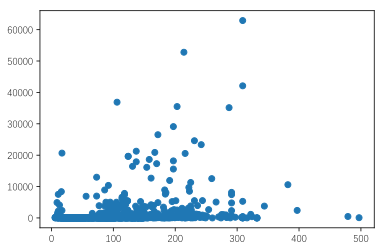

In [42]:
plt.figure()
plt.scatter(loanData[loanData['申请条件'].notnull()]['申请条件'].str.len(),loanData[loanData['申请条件'].notnull()]['申请人数'])#,kde=False)
plt.show()

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


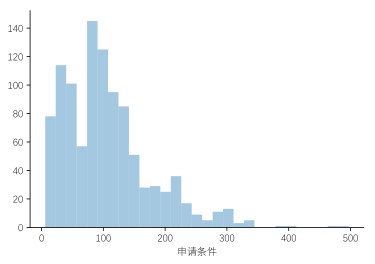

In [154]:
# 申请条件文本长度频率分析
plt.figure()
sns.despine(ax=plt.gca())
sns.distplot(loanData[loanData['申请条件'].notnull()]['申请条件'].str.len(),kde=False)
plt.show()

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


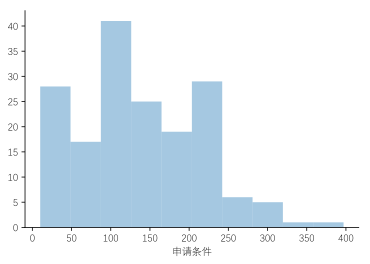

In [155]:
# 对银行机构进行申请条件文本长度频率分析
plt.figure()
sns.despine(ax=plt.gca())
sns.distplot(loanData[(loanData['机构性质']=='银行')&loanData['申请条件'].notnull()]['申请条件'].str.len(),kde=False)
plt.show()

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


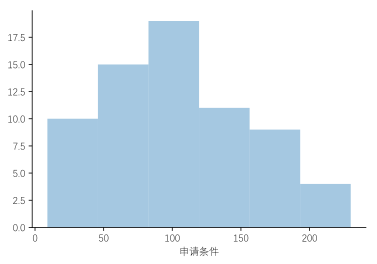

In [156]:
# 对保险机构进行申请条件文本长度频率分析
plt.figure()
sns.despine(ax=plt.gca())
sns.distplot(loanData[(loanData['机构性质']=='保险')&loanData['申请条件'].notnull()]['申请条件'].str.len(),kde=False)
plt.show()

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


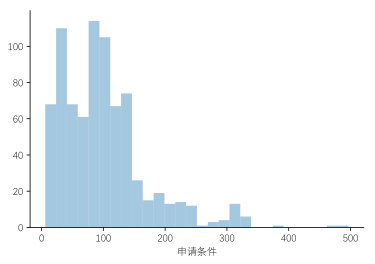

In [157]:
# 对保险机构进行申请条件文本长度频率分析
plt.figure()
sns.despine(ax=plt.gca())
sns.distplot(loanData[(loanData['机构性质']=='其他')&loanData['申请条件'].notnull()]['申请条件'].str.len(),kde=False)
plt.show()